In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
DATA_DIR = 'D:/Data/stocks/'
COST_DIR = 'D:/Data/avg_cost/by stock/'
CODE = '601336.SH'

In [62]:
fname = '%s/%s.xlsx'%(DATA_DIR, CODE)

In [63]:
df = pd.read_excel(fname)

In [64]:
df.tail()

,amt,close,dealnum,high,low,mfd_buyamt_a,mfd_sellamt_a,mkt_freeshares,pe_ttm,turnover,volume,vwap
2019-03-13,9.272969e+08,49.82,29821.0,51.50,49.60,66070197.0,80585203.0,3.499840e+10,19.323114,0.026495,18433109.0,50.306048
2019-03-14,7.210032e+08,50.00,21117.0,50.67,49.37,71964965.0,78790847.0,3.512485e+10,19.392929,0.020527,14384685.0,50.122978
2019-03-15,1.187489e+09,51.25,33859.0,52.30,50.30,167953783.0,137211619.0,3.600297e+10,19.877752,0.032983,23058140.0,51.499765
2019-03-18,8.847275e+08,52.60,28198.0,52.89,50.80,149948988.0,65220418.0,3.695134e+10,20.401361,0.023943,17008577.0,52.016550
2019-03-19,9.801793e+08,52.08,28731.0,53.87,51.90,62513180.0,131434903.0,3.658605e+10,20.199675,0.026791,18584145.0,52.742770


In [65]:
fname = '%s/%s.xlsx'%(COST_DIR, CODE)

In [66]:
cdf = pd.read_excel(fname)

In [67]:
cdf.tail()

,turnover days,avg cost,close,profit percentage,current return
2019-03-13,28.0,48.088110,49.82,0.560481,0.036015
2019-03-14,28.0,48.300698,50.00,0.585534,0.035182
2019-03-15,27.0,48.631492,51.25,0.662072,0.053844
2019-03-18,27.0,48.810097,52.60,0.845588,0.077646
2019-03-19,27.0,49.187556,52.08,0.816337,0.058804


## 换手天数和周期

In [68]:
cdf.index[int(-cdf['turnover days'][-1])]

Timestamp('2019-02-11 00:00:00')

[Text(1,0,' 10'),
 Text(1,0,' 20'),
 Text(1,0,' 30'),
 Text(1,0,' 40'),
 Text(1,0,' 50'),
 Text(1,0,' 60'),
 Text(1,0,' 70'),
 Text(1,0,' 80')]

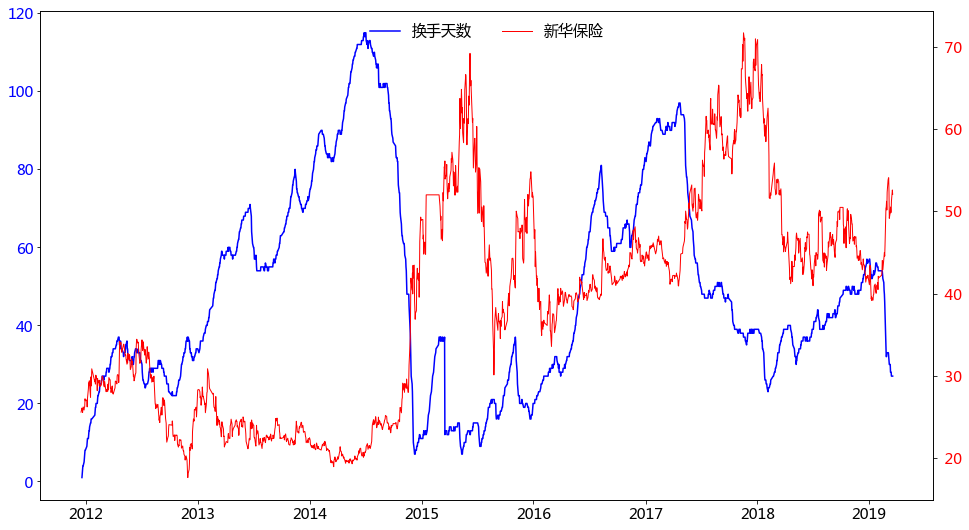

In [110]:
fig, ax = plt.subplots(figsize=(16, 9))
lns1 = ax.plot(cdf['turnover days'], color='blue', label=u'换手天数')
axx = ax.twinx()
lns2 = axx.plot(df['close'], color='red', label=u'新华保险', linewidth=1)
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, frameon=False, fontsize=15, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1))
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
axx.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}'.format(x) for x in vals], color='blue')
vals = axx.get_yticks()
axx.set_yticklabels(['{:3.0f}'.format(x) for x in vals], color='red')

[Text(1,0,' 10'),
 Text(1,0,' 20'),
 Text(1,0,' 30'),
 Text(1,0,' 40'),
 Text(1,0,' 50'),
 Text(1,0,' 60'),
 Text(1,0,' 70'),
 Text(1,0,' 80')]

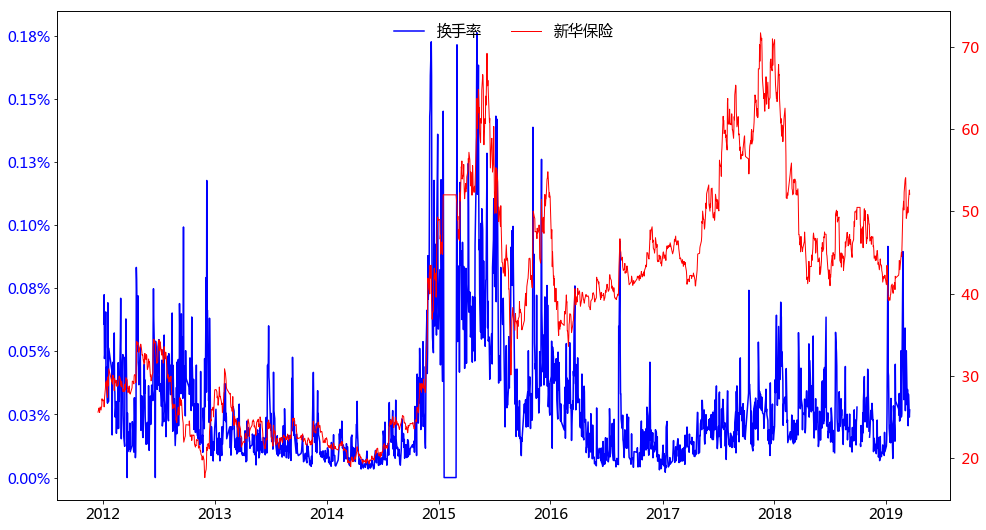

In [112]:
fig, ax = plt.subplots(figsize=(16, 9))
lns1 = ax.plot(df[df.index >= '2012-01-01']['turnover'], color='blue', label=u'换手率')

axx = ax.twinx()
lns2 = axx.plot(df['close'], color='red', label=u'新华保险', linewidth=1)
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, frameon=False, fontsize=15, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1))

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
axx.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.2f}%'.format(x) for x in vals], color='blue')
vals = axx.get_yticks()
axx.set_yticklabels(['{:3.0f}'.format(x) for x in vals], color='red')

[Text(0,0,'-30.00%'),
 Text(0,0,'-20.00%'),
 Text(0,0,'-10.00%'),
 Text(0,0,'0.00%'),
 Text(0,0,'10.00%'),
 Text(0,0,'20.00%'),
 Text(0,0,'30.00%')]

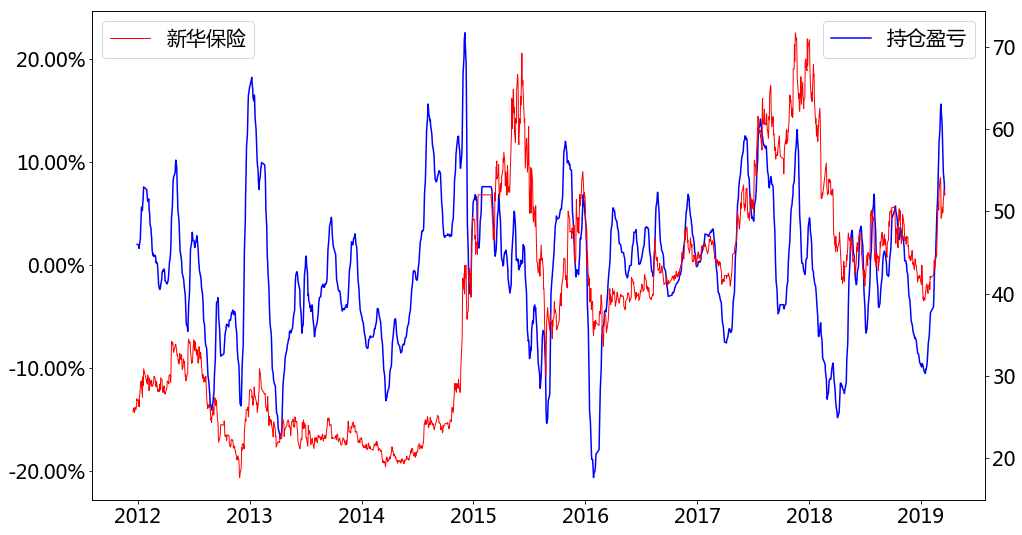

In [106]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(cdf['current return'].rolling(10).mean(), color='blue', label=u'持仓盈亏')
ax.legend(fontsize=20)
axx = ax.twinx()
axx.plot(df['close'], color='red', label=u'新华保险', linewidth=1)
axx.legend(fontsize=20, loc='upper left')
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
axx.yaxis.set_tick_params(labelsize=20)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])